# SUPERMARKET SALES FORCASTING

## 1. LIBRARIES REQUIRED

In [7]:
import numpy as np #linear algebra
import pandas as pd  #data processing and I/O CSV FILE
%matplotlib inline 
import matplotlib.pyplot as plt  #MATLAB format plot

from scipy.stats import norm,skew #statistics
import seaborn as sns
import warnings 
def ignore_warn(*args,**kwargs):
  pass
warnings.warn=ignore_warn

import os
os.getcwd()

'C:\\Users\\Apeksha\\Desktop\\PROJECT WORKS\\supermarket dataset'

## 2. READING DATA

In [8]:
data=pd.read_csv("train.csv")
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12,DRA12,DRA24,DRA24,DRA24,DRA24,...,NCZ53,NCZ53,NCZ53,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035,CHUKWUDI045,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI019,...,CHUKWUDI018,CHUKWUDI027,CHUKWUDI049,CHUKWUDI010,CHUKWUDI018,CHUKWUDI019,CHUKWUDI027,CHUKWUDI045,CHUKWUDI046,CHUKWUDI049
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035,DRA12_CHUKWUDI045,DRA24_CHUKWUDI010,DRA24_CHUKWUDI013,DRA24_CHUKWUDI017,DRA24_CHUKWUDI019,...,NCZ53_CHUKWUDI018,NCZ53_CHUKWUDI027,NCZ53_CHUKWUDI049,NCZ54_CHUKWUDI010,NCZ54_CHUKWUDI018,NCZ54_CHUKWUDI019,NCZ54_CHUKWUDI027,NCZ54_CHUKWUDI045,NCZ54_CHUKWUDI046,NCZ54_CHUKWUDI049
Product_Weight,11.6,11.6,11.6,11.6,11.6,11.6,19.35,19.35,19.35,NaN,...,9.6,NaN,9.6,14.65,14.65,NaN,NaN,14.65,14.65,14.65
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat,Low Fat,Normal Fat,Normal Fat,Normal Fat,Normal Fat,...,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat
Product_Shelf_Visibility,0.068535,0.0409118,0.0411775,0.0411127,0,0,0.0668317,0.039895,0.0401541,0.0699092,...,0.0245769,0.0243586,0.0245152,0,0.083699,0.145952,0.0829557,0.0835284,0.0833594,0.083489
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,...,Health and Hygiene,Health and Hygiene,Health and Hygiene,Household,Household,Household,Household,Household,Household,Household
Product_Price,357.54,355.79,350.79,355.04,354.79,354.04,409.72,406.22,411.72,408.22,...,466.55,476.05,473.05,403.89,408.64,402.39,410.14,406.14,404.89,403.39
Supermarket_Opening_Year,2005,1994,2014,2016,2011,2009,2005,1994,2014,1992,...,2016,1992,2006,2005,2016,1992,1992,2009,2004,2006
Supermarket _Size,NaN,High,NaN,Medium,Small,NaN,NaN,High,NaN,Small,...,Medium,Medium,Medium,NaN,Medium,Small,Medium,NaN,Small,Medium


In [9]:
data.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

## 3. UNDERSTANDING THE DATA

### FINDINING RELATIONSHIP BETWEEN THE COLUMNS

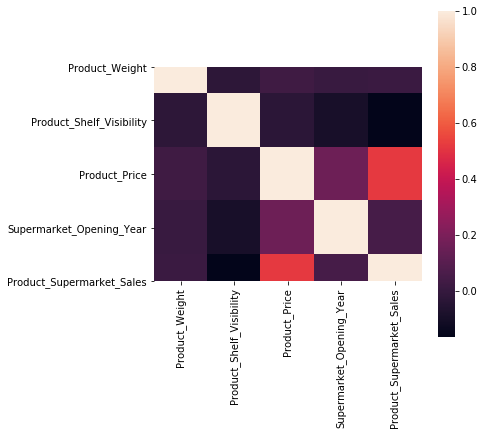

In [10]:
data_corr=data.corr()
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(data_corr,square=True)

In [11]:
data_corr

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
Product_Weight,1.000000,-0.025951,0.028609,0.009313,0.015322
Product_Shelf_Visibility,-0.025951,1.000000,-0.032835,-0.087939,-0.164943
Product_Price,0.028609,-0.032835,1.000000,0.160032,0.518285
Supermarket_Opening_Year,0.009313,-0.087939,0.160032,1.000000,0.051297
Product_Supermarket_Sales,0.015322,-0.164943,0.518285,0.051297,1.000000


### FINDING THE COLUMNS WITH MISSING VALUES

In [12]:
#sns.pairplot(data) #data with null values should be removed
data_missing=((data.isnull().sum())/len(data))*100
data_missing=data_missing.drop(data_missing[data_missing==0].index).sort_values(ascending=False)
data_missing

Supermarket _Size    29.058116
Product_Weight       16.072144
dtype: float64

### FINDING OUT IF COLUMN IS DISCRETE OR CONTINOUS

In [13]:
#value count for each feature
#data.Product_Identifier.value_counts()  #unique

In [49]:
#data.Supermarket_Identifier.value_counts() #categorical

In [50]:
#data.Product_Supermarket_Identifier.value_counts() #unique

In [51]:
#data.Product_Weight.value_counts()  #unique

In [52]:
data.Product_Fat_Content.value_counts() #categorical

Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64

In [53]:
#data.Product_Shelf_Visibility.value_counts() #unique

In [54]:
data.Product_Type.value_counts()  #categorical

Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64

In [55]:
#data.Product_Price.value_counts() #unique

In [56]:
#data.Supermarket_Opening_Year.value_counts()

In [57]:
data.Supermarket_Location_Type.value_counts()

Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dtype: int64

In [58]:
data.Supermarket_Type.value_counts()

Supermarket Type1    3304
Grocery Store         724
Supermarket Type2     500
Supermarket Type3     462
Name: Supermarket_Type, dtype: int64

In [59]:
#data.Product_Supermarket_Sales.value_counts()

### FINDING A WAY TO ENCODE COLUMN THAT CAN BE CATEGORISED  USING PAIRPLOTS

#pair plot for all categorical features
cat_columns=["Product_Type","Product_Fat_Content","Supermarket_Location_Type","Supermarket_Type"]
for i in cat_columns:
    cols=['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales']
    plt.figure()
    sns.pairplot(data[cols],size=3.0,hue=i)
    plt.show()

In [60]:
cols=['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales']

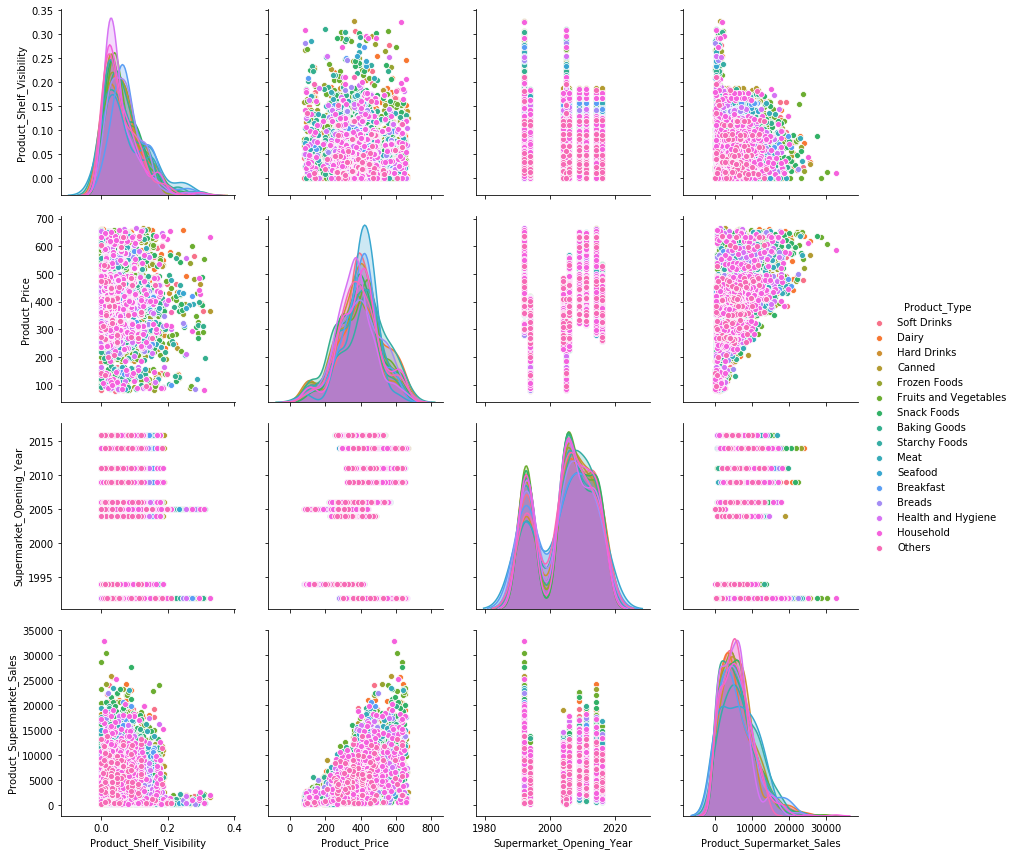

In [61]:
sns.pairplot(data[cols],size=3.0,hue="Product_Type")

##### INFERENCE FROM THE ABOVE PLOT

##### 1. Product type =health&hygiene,household,others(pink)cover a large portion of data

###### new column = {1 if data is pink  ; 0 if not pink }

##### 2. PRODUCT PRICE AND SUPERMARKET SALES ARE POSITIVELY CORRELATED

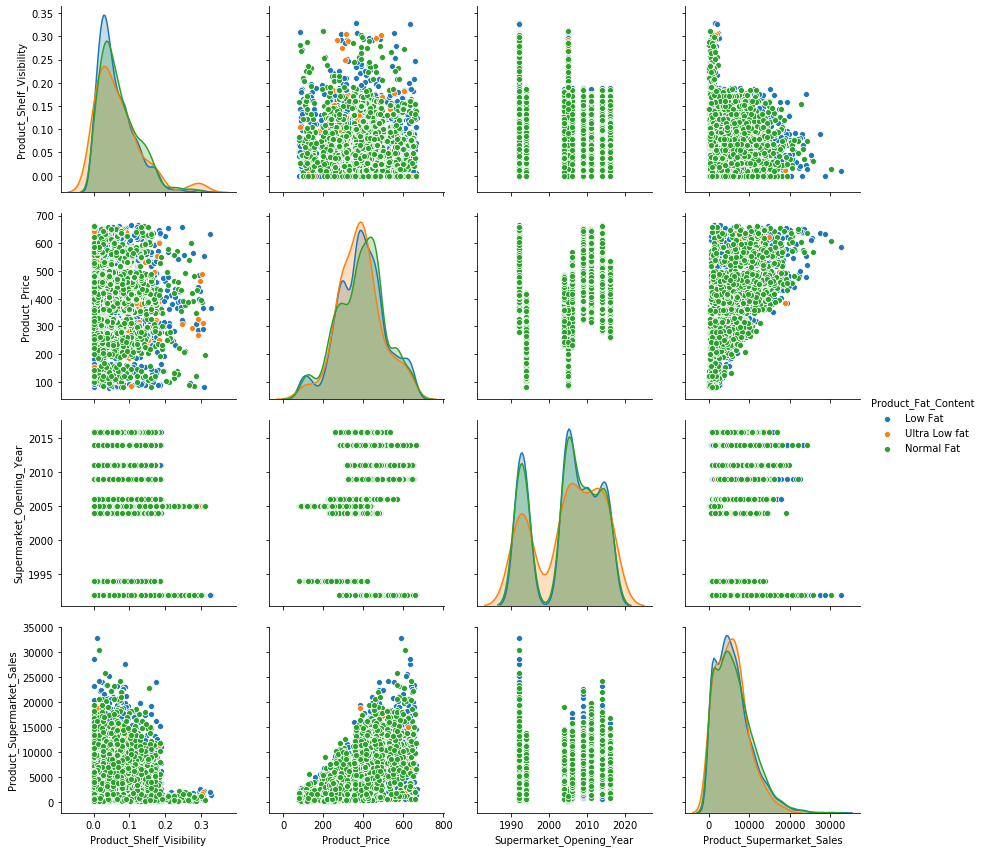

In [62]:
sns.pairplot(data[cols],size=3.0,hue="Product_Fat_Content")

##### INFERENCE FROM THE ABOVE PLOT

##### 1. Product fat content =normal fat (green) cover a large portion of data

###### new column = {1 if data is green  ; 0 if not pink }
 
##### 2. price of normal fat < price  of low fat and ultra low fat


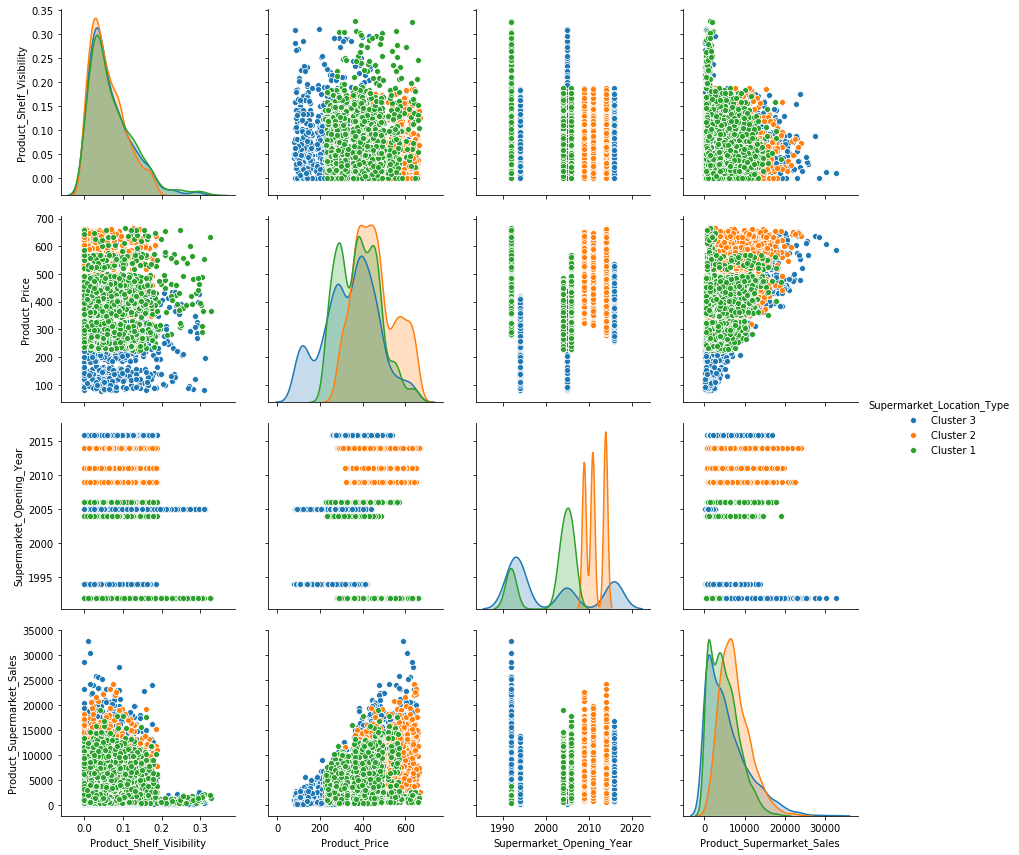

In [63]:
sns.pairplot(data[cols],size=3.0,hue="Supermarket_Location_Type")

##### INFERENCE FROM THE ABOVE PLOT

##### 1. cluster2 are newer 

###### new column = {1 if data > 2000  ; 0 if data < 2000  }
 
##### 2. product price of cluster 3 is low ,cluster 1 is in between,cluster 2 is at the highest 


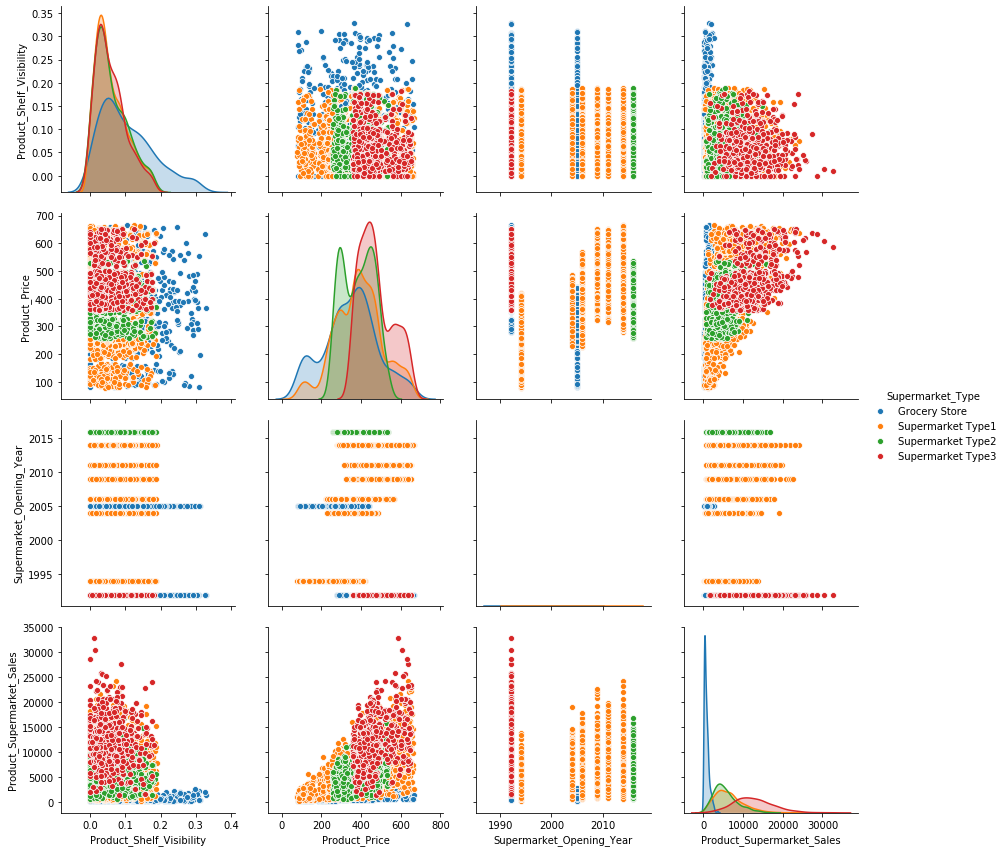

In [64]:
sns.pairplot(data[cols],size=3.0,hue="Supermarket_Type")

##### INFERENCE FROM THE ABOVE PLOT

##### 1.categories the supermarket based on the product price

###### type1  <   250    ;   250  <  type2  <  350  ;  350  <  type3  ;   type 4  =  no range


## 4. FEATURE ENGINEERING

###  ADD DATA ATTRIBUTE

In [65]:
data.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [14]:
product_type=list(data.Product_Type.unique())
product_type

['Soft Drinks',
 'Dairy',
 'Hard Drinks',
 'Canned',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Snack Foods',
 'Baking Goods',
 'Starchy Foods',
 'Meat',
 'Seafood',
 'Breakfast',
 'Breads',
 'Health and Hygiene',
 'Household',
 'Others']

In [15]:
product_type=list(data.Product_Type.unique())
product_type.remove("Health and Hygiene")
product_type.remove("Household")
product_type.remove("Others")
def cluster_product_type(product):
    if product in product_type:
        return 0
    else:
        return 1

data["product_type_encoded"]=data["Product_Type"].apply(cluster_product_type)
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12,DRA12,DRA24,DRA24,DRA24,DRA24,...,NCZ53,NCZ53,NCZ53,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035,CHUKWUDI045,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI019,...,CHUKWUDI018,CHUKWUDI027,CHUKWUDI049,CHUKWUDI010,CHUKWUDI018,CHUKWUDI019,CHUKWUDI027,CHUKWUDI045,CHUKWUDI046,CHUKWUDI049
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035,DRA12_CHUKWUDI045,DRA24_CHUKWUDI010,DRA24_CHUKWUDI013,DRA24_CHUKWUDI017,DRA24_CHUKWUDI019,...,NCZ53_CHUKWUDI018,NCZ53_CHUKWUDI027,NCZ53_CHUKWUDI049,NCZ54_CHUKWUDI010,NCZ54_CHUKWUDI018,NCZ54_CHUKWUDI019,NCZ54_CHUKWUDI027,NCZ54_CHUKWUDI045,NCZ54_CHUKWUDI046,NCZ54_CHUKWUDI049
Product_Weight,11.6,11.6,11.6,11.6,11.6,11.6,19.35,19.35,19.35,NaN,...,9.6,NaN,9.6,14.65,14.65,NaN,NaN,14.65,14.65,14.65
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat,Low Fat,Normal Fat,Normal Fat,Normal Fat,Normal Fat,...,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat
Product_Shelf_Visibility,0.068535,0.0409118,0.0411775,0.0411127,0,0,0.0668317,0.039895,0.0401541,0.0699092,...,0.0245769,0.0243586,0.0245152,0,0.083699,0.145952,0.0829557,0.0835284,0.0833594,0.083489
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,...,Health and Hygiene,Health and Hygiene,Health and Hygiene,Household,Household,Household,Household,Household,Household,Household
Product_Price,357.54,355.79,350.79,355.04,354.79,354.04,409.72,406.22,411.72,408.22,...,466.55,476.05,473.05,403.89,408.64,402.39,410.14,406.14,404.89,403.39
Supermarket_Opening_Year,2005,1994,2014,2016,2011,2009,2005,1994,2014,1992,...,2016,1992,2006,2005,2016,1992,1992,2009,2004,2006
Supermarket _Size,NaN,High,NaN,Medium,Small,NaN,NaN,High,NaN,Small,...,Medium,Medium,Medium,NaN,Medium,Small,Medium,NaN,Small,Medium


In [16]:
data.product_type_encoded.value_counts()

0    4016
1     974
Name: product_type_encoded, dtype: int64

In [17]:
def cluster_fat_content(fat_content):
    if (fat_content=="Normal Fat"):
        return 1
    else:
        return 0

data["fat_content_encoded"]=data["Product_Fat_Content"].apply(cluster_fat_content)
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12,DRA12,DRA24,DRA24,DRA24,DRA24,...,NCZ53,NCZ53,NCZ53,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035,CHUKWUDI045,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI019,...,CHUKWUDI018,CHUKWUDI027,CHUKWUDI049,CHUKWUDI010,CHUKWUDI018,CHUKWUDI019,CHUKWUDI027,CHUKWUDI045,CHUKWUDI046,CHUKWUDI049
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035,DRA12_CHUKWUDI045,DRA24_CHUKWUDI010,DRA24_CHUKWUDI013,DRA24_CHUKWUDI017,DRA24_CHUKWUDI019,...,NCZ53_CHUKWUDI018,NCZ53_CHUKWUDI027,NCZ53_CHUKWUDI049,NCZ54_CHUKWUDI010,NCZ54_CHUKWUDI018,NCZ54_CHUKWUDI019,NCZ54_CHUKWUDI027,NCZ54_CHUKWUDI045,NCZ54_CHUKWUDI046,NCZ54_CHUKWUDI049
Product_Weight,11.6,11.6,11.6,11.6,11.6,11.6,19.35,19.35,19.35,NaN,...,9.6,NaN,9.6,14.65,14.65,NaN,NaN,14.65,14.65,14.65
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat,Low Fat,Normal Fat,Normal Fat,Normal Fat,Normal Fat,...,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat
Product_Shelf_Visibility,0.068535,0.0409118,0.0411775,0.0411127,0,0,0.0668317,0.039895,0.0401541,0.0699092,...,0.0245769,0.0243586,0.0245152,0,0.083699,0.145952,0.0829557,0.0835284,0.0833594,0.083489
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,...,Health and Hygiene,Health and Hygiene,Health and Hygiene,Household,Household,Household,Household,Household,Household,Household
Product_Price,357.54,355.79,350.79,355.04,354.79,354.04,409.72,406.22,411.72,408.22,...,466.55,476.05,473.05,403.89,408.64,402.39,410.14,406.14,404.89,403.39
Supermarket_Opening_Year,2005,1994,2014,2016,2011,2009,2005,1994,2014,1992,...,2016,1992,2006,2005,2016,1992,1992,2009,2004,2006
Supermarket _Size,NaN,High,NaN,Medium,Small,NaN,NaN,High,NaN,Small,...,Medium,Medium,Medium,NaN,Medium,Small,Medium,NaN,Small,Medium


In [18]:
def cluster_year(year):
    if (year>2000):
        return 1
    else:
        return 0

data["year_encoded"]=data["Supermarket_Opening_Year"].apply(cluster_year)
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12,DRA12,DRA24,DRA24,DRA24,DRA24,...,NCZ53,NCZ53,NCZ53,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035,CHUKWUDI045,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI019,...,CHUKWUDI018,CHUKWUDI027,CHUKWUDI049,CHUKWUDI010,CHUKWUDI018,CHUKWUDI019,CHUKWUDI027,CHUKWUDI045,CHUKWUDI046,CHUKWUDI049
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035,DRA12_CHUKWUDI045,DRA24_CHUKWUDI010,DRA24_CHUKWUDI013,DRA24_CHUKWUDI017,DRA24_CHUKWUDI019,...,NCZ53_CHUKWUDI018,NCZ53_CHUKWUDI027,NCZ53_CHUKWUDI049,NCZ54_CHUKWUDI010,NCZ54_CHUKWUDI018,NCZ54_CHUKWUDI019,NCZ54_CHUKWUDI027,NCZ54_CHUKWUDI045,NCZ54_CHUKWUDI046,NCZ54_CHUKWUDI049
Product_Weight,11.6,11.6,11.6,11.6,11.6,11.6,19.35,19.35,19.35,NaN,...,9.6,NaN,9.6,14.65,14.65,NaN,NaN,14.65,14.65,14.65
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat,Low Fat,Normal Fat,Normal Fat,Normal Fat,Normal Fat,...,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat
Product_Shelf_Visibility,0.068535,0.0409118,0.0411775,0.0411127,0,0,0.0668317,0.039895,0.0401541,0.0699092,...,0.0245769,0.0243586,0.0245152,0,0.083699,0.145952,0.0829557,0.0835284,0.0833594,0.083489
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,...,Health and Hygiene,Health and Hygiene,Health and Hygiene,Household,Household,Household,Household,Household,Household,Household
Product_Price,357.54,355.79,350.79,355.04,354.79,354.04,409.72,406.22,411.72,408.22,...,466.55,476.05,473.05,403.89,408.64,402.39,410.14,406.14,404.89,403.39
Supermarket_Opening_Year,2005,1994,2014,2016,2011,2009,2005,1994,2014,1992,...,2016,1992,2006,2005,2016,1992,1992,2009,2004,2006
Supermarket _Size,NaN,High,NaN,Medium,Small,NaN,NaN,High,NaN,Small,...,Medium,Medium,Medium,NaN,Medium,Small,Medium,NaN,Small,Medium


### TRANSFORMING SKEWED FEATURE

                              # <             """YET TO BE DONE"""                 >

Text(0.5, 1.0, 'DE-SKEWED DATA')

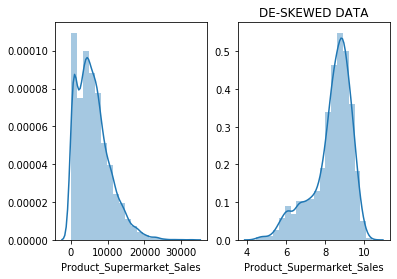

In [19]:
fig,ax=plt.subplots(1,2)
sns.distplot(data['Product_Supermarket_Sales'],bins=20,ax=ax[0])
plt.title('SKEWED DATA')
data['Product_Supermarket_Sales']=np.log1p(data['Product_Supermarket_Sales'])
sns.distplot(data['Product_Supermarket_Sales'],bins=20,ax=ax[1])
plt.title('DE-SKEWED DATA')

Text(0.5, 1.0, 'DE-SKEWED DATA')

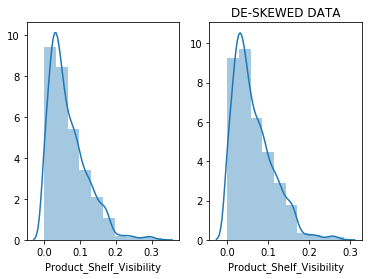

In [20]:
fig,ax=plt.subplots(1,2)
plt.title('SKEWED DATA')
sns.distplot(data['Product_Shelf_Visibility'],bins=10,ax=ax[0])
data['Product_Shelf_Visibility']=np.log1p(data['Product_Shelf_Visibility'])
sns.distplot(data['Product_Shelf_Visibility'],bins=10,ax=ax[1])
plt.title('DE-SKEWED DATA')

### * CATEGORICAL ENCODING
 - ordinal (normal fat ,low fat,ultra low fat)
 - non ordinal( pink , red , green)
 
 ### LESS NUMBER OF CLASSES 
  ##### 1. ONE HOT ENCODING (SET OF BITS TO REPRESENT CLASS IN WHICH ONE BIT WILL BE ONE AND ONLY ONE CLASS AT A TIME)
  ##### 2. DUMMY ENCODING (SAME AS ONE HOT ENCODING ,HERE WE CONSIDER ALL ZEROS AS A CLASS HENCE 1 BIT IS REDUCED)
 ### MORE NUMBER OF CLASSES
  ##### 1.LABEL ENCODING( ASSIGN 1 TO N TO EACH CATEGORY/CLASSES)
  ##### 2.EMBEDDING,FEATURE HASHING ,BINNING ETC

#### NOTE     
label encoding affects the model like neural network and KNN which takes magnitude into consideration

In [21]:
target_y=data["Product_Supermarket_Sales"]

In [22]:
newdata=data
newdata.drop("Product_Supermarket_Sales",axis=1,inplace=True)
target_y.head()

0    6.565378
1    8.761345
2    8.761345
3    7.663046
4    7.817130
Name: Product_Supermarket_Sales, dtype: float64

In [23]:
newdata.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12,DRA12,DRA24,DRA24,DRA24,DRA24,...,NCZ53,NCZ53,NCZ53,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54,NCZ54
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035,CHUKWUDI045,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI019,...,CHUKWUDI018,CHUKWUDI027,CHUKWUDI049,CHUKWUDI010,CHUKWUDI018,CHUKWUDI019,CHUKWUDI027,CHUKWUDI045,CHUKWUDI046,CHUKWUDI049
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035,DRA12_CHUKWUDI045,DRA24_CHUKWUDI010,DRA24_CHUKWUDI013,DRA24_CHUKWUDI017,DRA24_CHUKWUDI019,...,NCZ53_CHUKWUDI018,NCZ53_CHUKWUDI027,NCZ53_CHUKWUDI049,NCZ54_CHUKWUDI010,NCZ54_CHUKWUDI018,NCZ54_CHUKWUDI019,NCZ54_CHUKWUDI027,NCZ54_CHUKWUDI045,NCZ54_CHUKWUDI046,NCZ54_CHUKWUDI049
Product_Weight,11.6,11.6,11.6,11.6,11.6,11.6,19.35,19.35,19.35,NaN,...,9.6,NaN,9.6,14.65,14.65,NaN,NaN,14.65,14.65,14.65
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat,Low Fat,Normal Fat,Normal Fat,Normal Fat,Normal Fat,...,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat
Product_Shelf_Visibility,0.0662886,0.0400971,0.0403523,0.04029,0,0,0.0646932,0.0391198,0.0393689,0.0675738,...,0.0242797,0.0240667,0.0242195,0,0.0803802,0.136235,0.0796941,0.0802228,0.0800668,0.0801864
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,...,Health and Hygiene,Health and Hygiene,Health and Hygiene,Household,Household,Household,Household,Household,Household,Household
Product_Price,357.54,355.79,350.79,355.04,354.79,354.04,409.72,406.22,411.72,408.22,...,466.55,476.05,473.05,403.89,408.64,402.39,410.14,406.14,404.89,403.39
Supermarket_Opening_Year,2005,1994,2014,2016,2011,2009,2005,1994,2014,1992,...,2016,1992,2006,2005,2016,1992,1992,2009,2004,2006
Supermarket _Size,NaN,High,NaN,Medium,Small,NaN,NaN,High,NaN,Small,...,Medium,Medium,Medium,NaN,Medium,Small,Medium,NaN,Small,Medium


In [24]:
newdata.drop("Product_Identifier",axis=1,inplace=True)
newdata.drop("Supermarket_Identifier",axis=1,inplace=True)
newdata.drop("Product_Supermarket_Identifier",axis=1,inplace=True)
newdata.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,product_type_encoded,fat_content_encoded,year_encoded
0,11.6,Low Fat,0.066289,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,0,0,1
1,11.6,Low Fat,0.040097,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,0,0,0
2,11.6,Low Fat,0.040352,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,0,0,1
3,11.6,Low Fat,0.040290,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,0,0,1
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,0,0,1


In [25]:
newdata=pd.get_dummies(newdata)
newdata.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989
Product_Weight,11.600000,11.600000,11.600000,11.60000,11.60,11.60,19.350000,19.35000,19.350000,NaN,...,9.60000,NaN,9.60000,14.65,14.65000,NaN,NaN,14.650000,14.650000,14.650000
Product_Shelf_Visibility,0.066289,0.040097,0.040352,0.04029,0.00,0.00,0.064693,0.03912,0.039369,0.067574,...,0.02428,0.024067,0.02422,0.00,0.08038,0.136235,0.079694,0.080223,0.080067,0.080186
Product_Price,357.540000,355.790000,350.790000,355.04000,354.79,354.04,409.720000,406.22000,411.720000,408.220000,...,466.55000,476.050000,473.05000,403.89,408.64000,402.390000,410.140000,406.140000,404.890000,403.390000
Supermarket_Opening_Year,2005.000000,1994.000000,2014.000000,2016.00000,2011.00,2009.00,2005.000000,1994.00000,2014.000000,1992.000000,...,2016.00000,1992.000000,2006.00000,2005.00,2016.00000,1992.000000,1992.000000,2009.000000,2004.000000,2006.000000
product_type_encoded,0.000000,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,...,1.00000,1.000000,1.00000,1.00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
fat_content_encoded,0.000000,0.000000,0.000000,0.00000,0.00,0.00,1.000000,1.00000,1.000000,1.000000,...,0.00000,0.000000,0.00000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
year_encoded,1.000000,0.000000,1.000000,1.00000,1.00,1.00,1.000000,0.00000,1.000000,0.000000,...,1.00000,0.000000,1.00000,1.00,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000
Product_Fat_Content_Low Fat,1.000000,1.000000,1.000000,1.00000,0.00,1.00,0.000000,0.00000,0.000000,0.000000,...,1.00000,1.000000,1.00000,1.00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
Product_Fat_Content_Normal Fat,0.000000,0.000000,0.000000,0.00000,0.00,0.00,1.000000,1.00000,1.000000,1.000000,...,0.00000,0.000000,0.00000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Product_Fat_Content_Ultra Low fat,0.000000,0.000000,0.000000,0.00000,1.00,0.00,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


### HANDLING  MISSING VALUES

In [26]:
newdata.isnull().sum()

Product_Weight                         802
Product_Shelf_Visibility                 0
Product_Price                            0
Supermarket_Opening_Year                 0
product_type_encoded                     0
fat_content_encoded                      0
year_encoded                             0
Product_Fat_Content_Low Fat              0
Product_Fat_Content_Normal Fat           0
Product_Fat_Content_Ultra Low fat        0
Product_Type_Baking Goods                0
Product_Type_Breads                      0
Product_Type_Breakfast                   0
Product_Type_Canned                      0
Product_Type_Dairy                       0
Product_Type_Frozen Foods                0
Product_Type_Fruits and Vegetables       0
Product_Type_Hard Drinks                 0
Product_Type_Health and Hygiene          0
Product_Type_Household                   0
Product_Type_Meat                        0
Product_Type_Others                      0
Product_Type_Seafood                     0
Product_Typ

In [27]:
pw_mean=newdata['Product_Weight'].mean()
newdata['Product_Weight'].fillna(pw_mean,inplace=True)
newdata.isnull().sum()

Product_Weight                         0
Product_Shelf_Visibility               0
Product_Price                          0
Supermarket_Opening_Year               0
product_type_encoded                   0
fat_content_encoded                    0
year_encoded                           0
Product_Fat_Content_Low Fat            0
Product_Fat_Content_Normal Fat         0
Product_Fat_Content_Ultra Low fat      0
Product_Type_Baking Goods              0
Product_Type_Breads                    0
Product_Type_Breakfast                 0
Product_Type_Canned                    0
Product_Type_Dairy                     0
Product_Type_Frozen Foods              0
Product_Type_Fruits and Vegetables     0
Product_Type_Hard Drinks               0
Product_Type_Health and Hygiene        0
Product_Type_Household                 0
Product_Type_Meat                      0
Product_Type_Others                    0
Product_Type_Seafood                   0
Product_Type_Snack Foods               0
Product_Type_Sof

### Spliting the dataset into Training and testing 

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(newdata,target_y,test_size=0.3)
print("x_train.shape",x_train.shape)
print("x_test.shape",x_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

x_train.shape (3493, 36)
x_test.shape (1497, 36)
y_train.shape (3493,)
y_test.shape (1497,)


### FEATURE NORMALIZATION/ SCALING

In [29]:
from sklearn.preprocessing import RobustScaler
scalar=RobustScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train[:5,:5]

array([[ 0.        ,  0.30984461,  1.13117274, -0.82352941,  0.        ],
       [ 0.13541894, -0.28684145, -0.6802024 ,  0.47058824,  0.        ],
       [-0.974653  ,  0.90234218,  0.07039006,  0.58823529,  0.        ],
       [ 0.42318873,  0.41900501,  0.3123679 ,  0.17647059,  0.        ],
       [ 0.        ,  0.45409682,  0.94139499, -0.82352941,  0.        ]])

### 5.MODELING 

#### LINEAR REGRESSION

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [31]:
def cross_validate(model, nfolds, X,y):
    score = -1 * (cross_val_score(model,X,y, cv=nfolds, scoring='neg_mean_absolute_error'))
    return np.mean(score)

In [36]:
# Multivariable
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
print("Mean absolute error",cross_validate(linear,10,x_train,y_train))

Mean absolute error 0.41939457092590987


#### DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
print("MAE Sccore: ", cross_validate(dt_model, 10, x_train, y_train))

MAE Sccore:  0.5823313421435987
